# Avocados ML project

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

import warnings

warnings.filterwarnings("ignore")

- Initial data inspection
- EDA

# Initial data inspection 

- Date: The date of the obervation
- Average price: The average price of a single avocados 
- Total volume: Total number of avocados sold
- 4046: Total number of avocados with PLU 4046 sold
- 4225: Total number of avocados with PLU 4225 sold
- 4770: Total number of avocados with PLU 4770 sold
- Total bags
- Small bags: 
- Large bags:

In [2]:
path = '/Users/mikkelpedersen/Desktop/project_vs_studio/ML projekter/avocado.csv'

avo = pd.read_csv(path)
avo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
avo = avo.drop(columns='Unnamed: 0')

In [4]:
avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [5]:
avo.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [6]:
def suma(data):
    null = data.isnull().sum()
    print(f'Here is all the missing values in the dataset: {null}')
    print(f'The shape of the  dataframe is: {data.shape}')
    print('-'*45)
    for col in data[['type', 'region']]:
        print(data[col].value_counts())
        print('-'*20)

In [7]:
suma(avo)

Here is all the missing values in the dataset: Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64
The shape of the  dataframe is: (18249, 13)
---------------------------------------------
type
conventional    9126
organic         9123
Name: count, dtype: int64
--------------------
region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
So

# EDA (Exploraty Data Analysis)

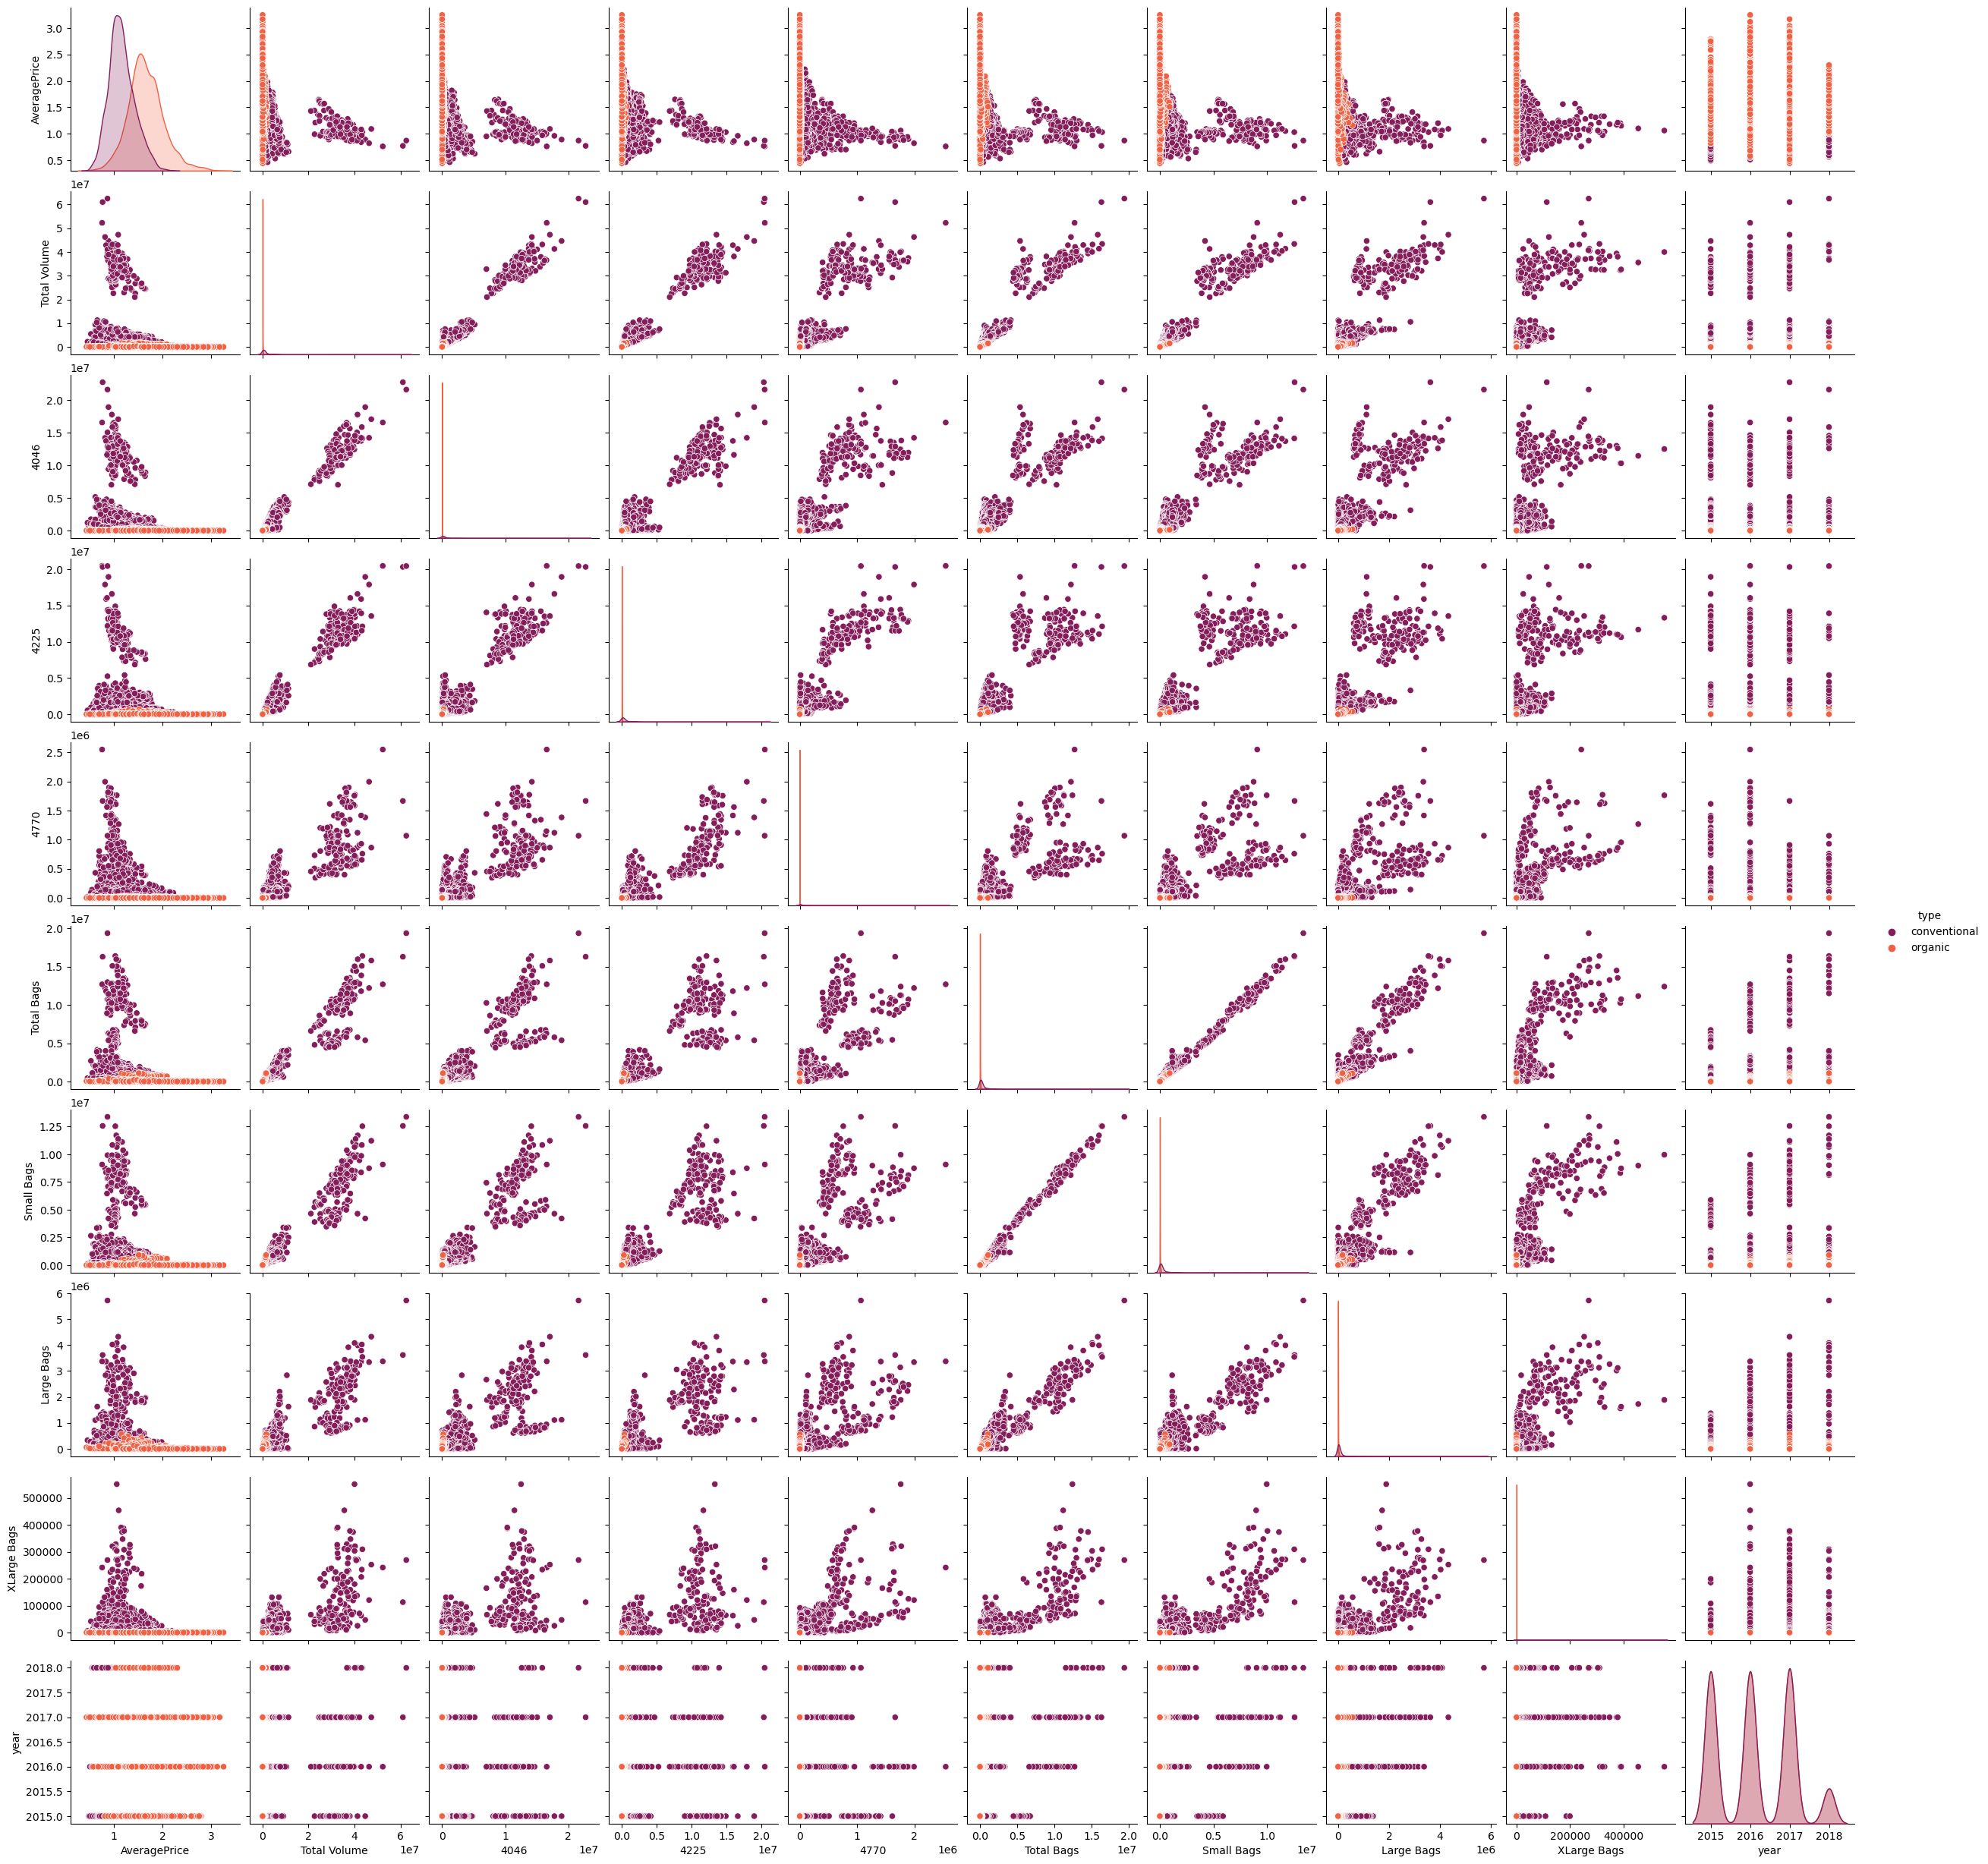

In [8]:
sns.pairplot(data=avo, hue='type', palette='rocket')

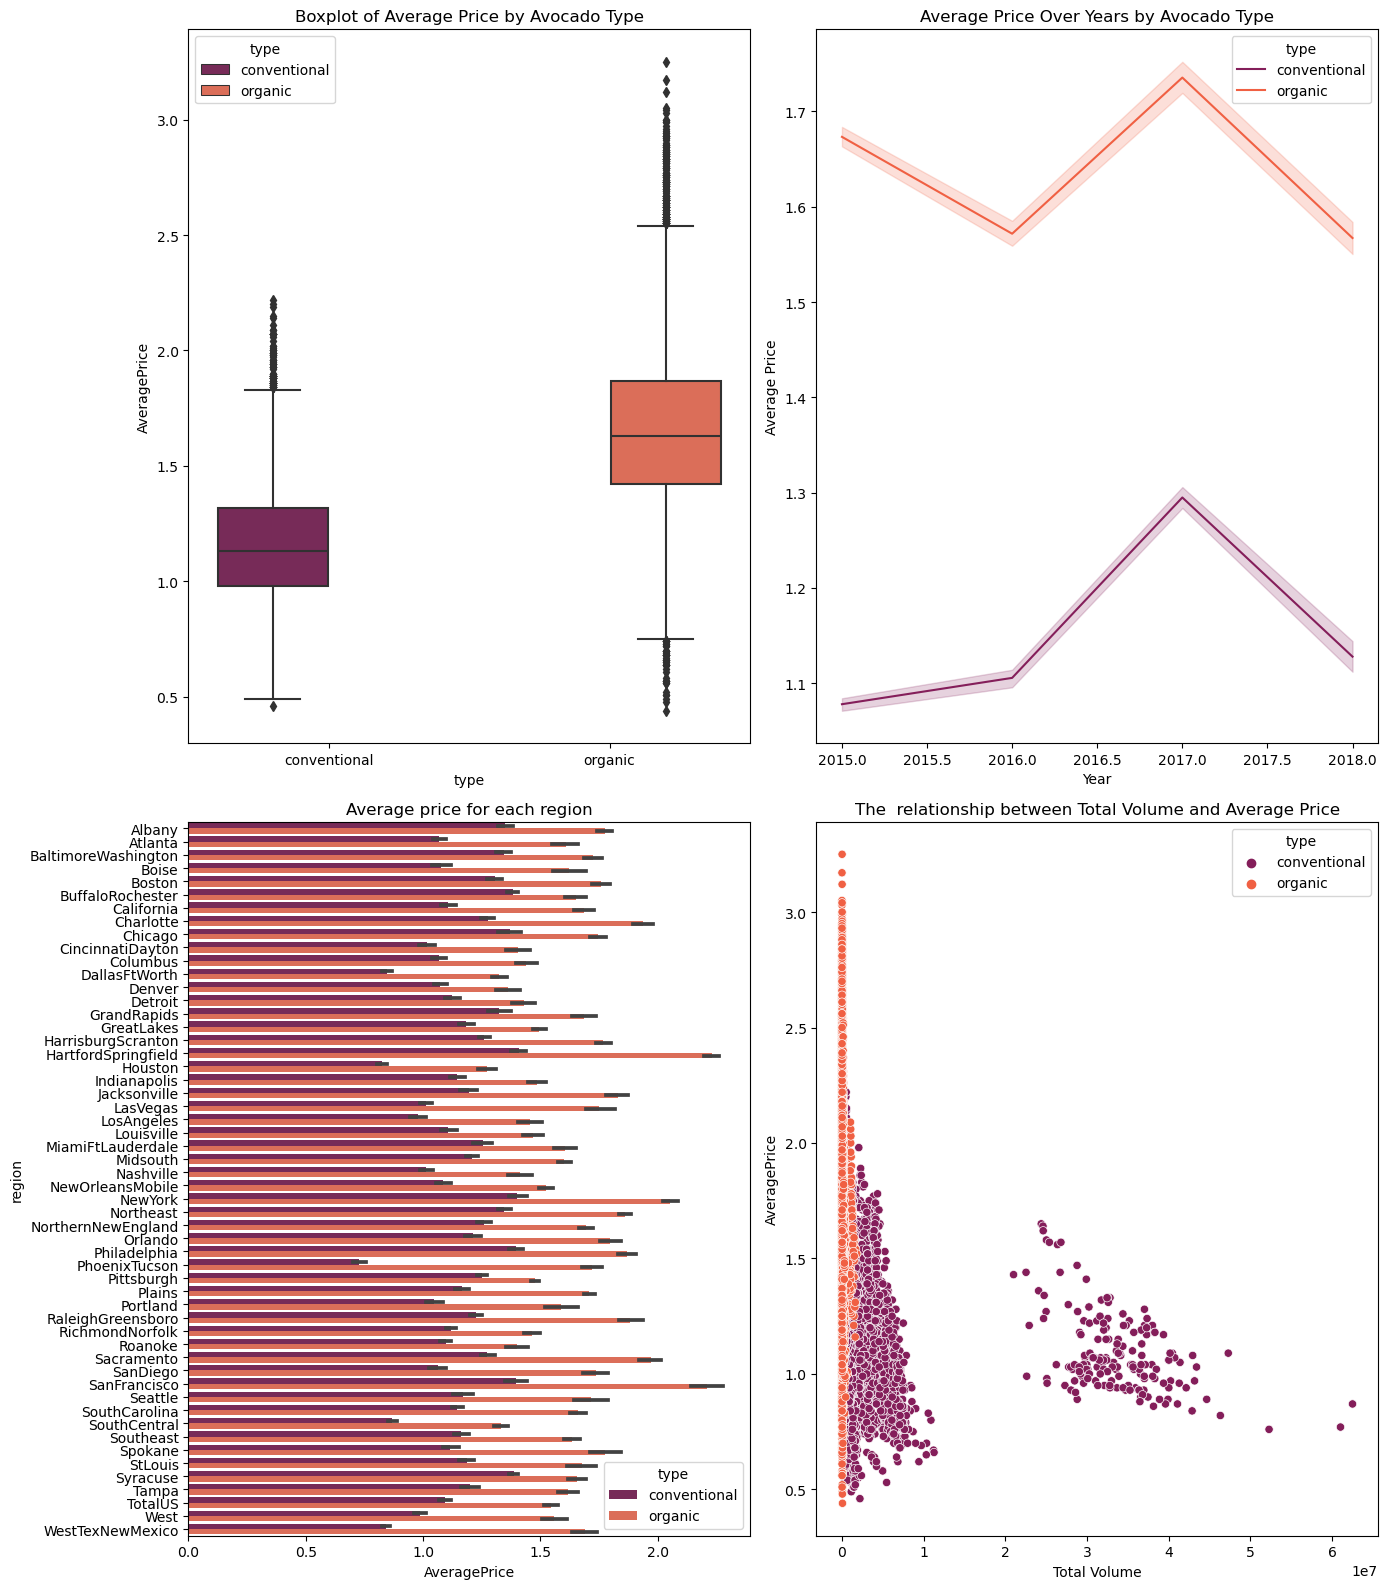

In [41]:
fig, axs = plt.subplots(2, 2, figsize=(14, 16))

# Plot 1: Boxplot
sns.boxplot(data=avo, x='type', y='AveragePrice', hue='type', palette='rocket', ax=axs[0, 0])
axs[0,0].set_title('Boxplot of Average Price by Avocado Type')

# Plot 2: Lineplot
sns.lineplot(data=avo, x='year', y='AveragePrice', hue='type', palette='rocket', ax=axs[0, 1])
axs[0,1].set_title('Average Price Over Years by Avocado Type')
axs[0,1].set_xlabel('Year')
axs[0,1].set_ylabel('Average Price')


# Plot 3: Barplot
sns.barplot(data=avo, x='AveragePrice', y='region', hue='type', palette='rocket' , ax=axs[1,0])
axs[1,0].set_title('Average price for each region')


# Plot 4: Scatter
sns.scatterplot(data=avo, x='Total Volume', y='AveragePrice', hue='type', palette='rocket', ax=axs[1,1])
axs[1,1].set_title('The  relationship between Total Volume and Average Price')


plt.tight_layout()
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53],
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'L

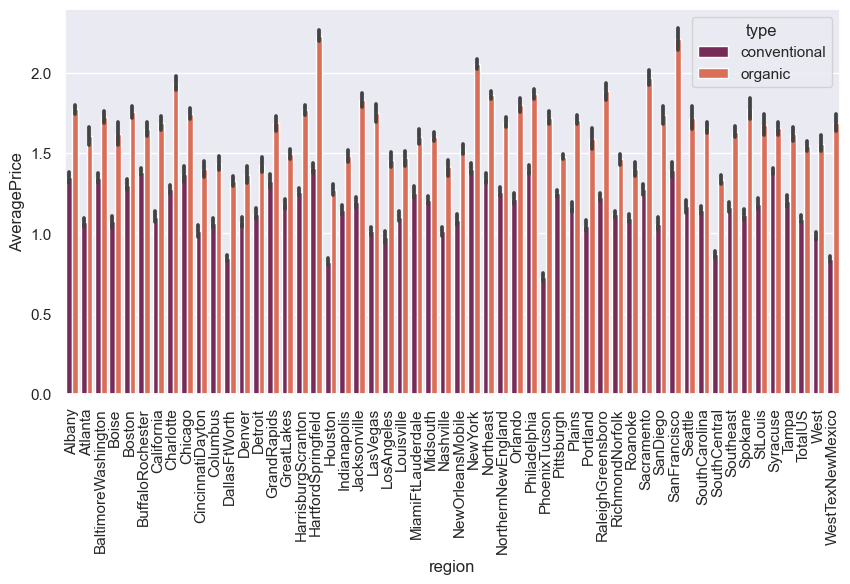

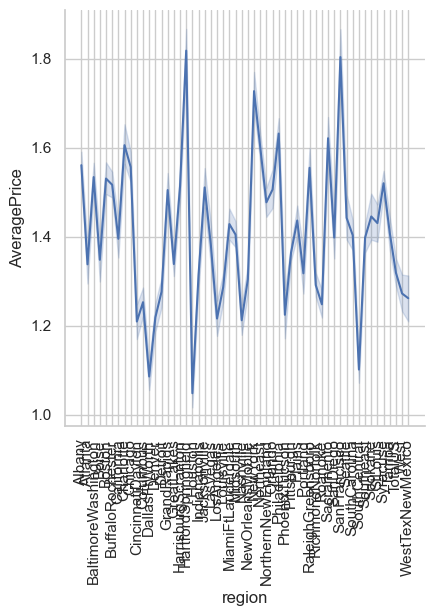

In [66]:
sns.barplot(data=avo, x='region', y='AveragePrice', hue='type', palette='rocket')
plt.xticks(rotation=90)

sns.set_style('whitegrid')
sns.relplot(data=avo, x='region', y='AveragePrice', kind='line')
plt.xticks(rotation=90)

# Preprocessing

In [80]:
ordi = OrdinalEncoder()
sst = StandardScaler()

def encode(data, columns):
    data[columns] = ordi.fit_transform(data[columns])
    return data

def scale(data, col):
    data[col] = sst.fit_transform(data[col])
    return data

In [74]:
avo = encode(avo, ['type', 'region'])

In [79]:
avo[['type', 'region']]

,type,region
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
18244,1.0,53.0
18245,1.0,53.0
18246,1.0,53.0
18247,1.0,53.0


In [84]:
avo = scale(avo, avo.columns)

ValueError: could not convert string to float: '2015-12-27'

In [82]:
avo

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,-0.230816,-0.199902,-0.212091,8696.87,8603.62,93.25,0.0,0.0,2015,0.0
1,2015-12-20,1.35,54876.98,-0.231103,-0.208054,-0.211997,9505.56,9408.07,97.49,0.0,0.0,2015,0.0
2,2015-12-13,0.93,118220.22,-0.231007,-0.154478,-0.211325,8145.35,8042.21,103.14,0.0,0.0,2015,0.0
3,2015-12-06,1.08,78992.15,-0.230741,-0.185350,-0.211864,5811.16,5677.40,133.76,0.0,0.0,2015,0.0
4,2015-11-29,1.28,51039.60,-0.230891,-0.208719,-0.211834,6183.95,5986.26,197.69,0.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,-0.230017,-0.243857,-0.212540,13498.67,13066.82,431.85,0.0,1.0,2018,53.0
18245,2018-01-28,1.71,13888.04,-0.230693,-0.242277,-0.212540,9264.84,8940.04,324.80,0.0,1.0,2018,53.0
18246,2018-01-21,1.87,13766.76,-0.230693,-0.243090,-0.205766,9394.11,9351.80,42.31,0.0,1.0,2018,53.0
18247,2018-01-14,1.93,16205.22,-0.230428,-0.242651,-0.205774,10969.54,10919.54,50.00,0.0,1.0,2018,53.0


In [ ]:
X = avo.drop(columns='')